In [1]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline
from datetime import datetime


# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split, GridSearchCV

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree, export_text
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

# lebel encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../dataset/Animal_Shelter_Intake_and_Outcome.csv')
df.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,CUPCAKE,DOG,MALTESE/POODLE TOY,WHITE,Spayed,TOY,10/06/2014,K23-045263,DA04,A328255,...,FIELD,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)",1
1,NaN,CAT,DOMESTIC SH,BLACK,Unknown,KITTN,NaN,K23-046275,RECEIVING,A420799,...,OVER THE COUNTER,TRANSFER,PETLUMA PP,UNKNOWN,HEALTHY,COUNTY,*PETALUMA,94952.0,"94952(38.237, -122.640695)",1
2,SYLVESTER,CAT,DOMESTIC LH,BLACK/WHITE,Neutered,SMALL,09/29/2013,K23-046271,CS05,A420773,...,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_MCHIP,HEALTHY,HEALTHY,COUNTY,OUT OF COUNTY,94901.0,"94901(37.9702346, -122.5260879)",1
3,NaN,CAT,DOMESTIC SH,BRN TABBY,Male,KITTN,08/15/2023,K23-046281,CI01,A420810,...,OVER THE COUNTER,TRANSFER,HSSC,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
4,*TESS,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,KITTN,05/07/2023,K23-044867,LOBBY,A417889,...,OVER THE COUNTER,ADOPTION,WALKIN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",1


In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())

0


In [4]:
import pandas as pd
from datetime import datetime

# Assuming df is your DataFrame
# List of columns you want to drop
columns_to_drop = ['Name', 'Impound Number', 'Kennel Number',
                   'Intake Subtype', 'Outcome Subtype', 'Intake Jurisdiction',
                   'Outcome Jurisdiction', 'Outcome Zip Code', 'Location', 'Count']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Print the DataFrame after dropping columns
print("After dropping columns:")
print(df.head())

# Filter rows
df = df[df['Type'] == 'CAT']
df = df[(df['Outcome Type'] == 'ADOPTION') | (df['Outcome Type'] == 'RETURN TO OWNER')]
df = df[df['Sex'] != 'Unknown']

# Print the DataFrame after filtering rows
print("After filtering rows:")
print(df.head())

# Convert 'Date of Birth' to datetime format
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])

# Calculate age based on the current date
current_date = datetime.now()
df['Age'] = (current_date - df['Date Of Birth']).astype('<m8[Y]')
df['Age'] = df['Age'].fillna(-1).astype(int)

# Print the DataFrame after calculating age
print("After calculating age:")
print(df.head())

# Drop rows with null values in 'Outcome Condition'
df = df.dropna(subset=['Outcome Condition'])

# Drop the 'Date Of Birth' column
df = df.drop(columns=['Date Of Birth'])

# Set a frequency threshold (you can adjust this value based on your criteria)
frequency_threshold = 20

# Calculate the frequency of each unique value in the specified column
value_counts = df['Color'].value_counts()

# Identify values with frequency below the threshold
low_frequency_values = value_counts[value_counts < frequency_threshold].index

# Drop rows where the specified values are present in the specified column
df = df[~df['Color'].isin(low_frequency_values)]

# Reset index
df.reset_index(drop=True, inplace=True)
df.head()
df.to_csv("../dataset/cleaned_dataset_nov_17.csv", index=False)

After dropping columns:
  Type               Breed            Color       Sex   Size Date Of Birth  \
0  DOG  MALTESE/POODLE TOY            WHITE    Spayed    TOY    10/06/2014   
1  CAT         DOMESTIC SH            BLACK   Unknown  KITTN           NaN   
2  CAT         DOMESTIC LH      BLACK/WHITE  Neutered  SMALL    09/29/2013   
3  CAT         DOMESTIC SH        BRN TABBY      Male  KITTN    08/15/2023   
4  CAT         DOMESTIC SH  ORG TABBY/WHITE    Spayed  KITTN    05/07/2023   

  Animal ID Intake Date Outcome Date  Days in Shelter Intake Type  \
0   A328255  07/05/2023   08/08/2023               34       STRAY   
1   A420799  09/30/2023   09/30/2023                0       STRAY   
2   A420773  09/29/2023   09/30/2023                1       STRAY   
3   A420810  09/30/2023   09/30/2023                0       STRAY   
4   A417889  05/30/2023   08/08/2023               70       STRAY   

      Outcome Type Intake Condition Outcome Condition  
0         ADOPTION          UNKNOWN 

In [5]:
# df = df[df['Sex'] != 'Unknown']

In [6]:
# #only keep cats
# df = df[df['Type'] == 'CAT']
# df = df[(df['Outcome Type'] == 'ADOPTION') | (df['Outcome Type'] == 'RETURN TO OWNER')]
# df.head()

In [7]:
# # Convert 'Date of Birth' to datetime format
# df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])

# # Calculate age based on the current date
# current_date = datetime.now()
# df['Age'] = (current_date - df['Date Of Birth']).astype('<m8[Y]')
# df.reset_index(drop=True, inplace=True)
# df.head(50)

In [8]:
print(df.isnull().sum())

Type                 0
Breed                0
Color                0
Sex                  0
Size                 0
Animal ID            0
Intake Date          0
Outcome Date         0
Days in Shelter      0
Intake Type          0
Outcome Type         0
Intake Condition     0
Outcome Condition    0
Age                  0
dtype: int64


In [9]:
# # Age is a quantitative data so we will fill out the null values of it with mean value
# # df['Age']= df['Age'].fillna(df['Age'].mean()).astype(int)
# df['Age']= df['Age'].fillna(-1).astype(int)
# df['Age'].isna().sum()


In [10]:
df['Age'].min()

-1

In [11]:
# rechecking for null values
print(df.isnull().sum())

Type                 0
Breed                0
Color                0
Sex                  0
Size                 0
Animal ID            0
Intake Date          0
Outcome Date         0
Days in Shelter      0
Intake Type          0
Outcome Type         0
Intake Condition     0
Outcome Condition    0
Age                  0
dtype: int64


In [12]:
# df = df.dropna(subset=['Outcome Condition'])
# df.reset_index(drop=True, inplace=True)

In [13]:
# rechecking for null values
print(df.isnull().sum())

Type                 0
Breed                0
Color                0
Sex                  0
Size                 0
Animal ID            0
Intake Date          0
Outcome Date         0
Days in Shelter      0
Intake Type          0
Outcome Type         0
Intake Condition     0
Outcome Condition    0
Age                  0
dtype: int64


In [14]:
# df = df.drop(columns=['Date Of Birth'])
# df.head(50)

In [15]:
# selecting rows that may matter for our prediction
new_df = df[['Breed', 'Sex', 'Age','Size','Intake Date', 'Intake Type', 'Intake Condition', 'Days in Shelter','Color']]
new_df

,Breed,Sex,Age,Size,Intake Date,Intake Type,Intake Condition,Days in Shelter,Color
0,DOMESTIC LH,Neutered,10,SMALL,09/29/2023,STRAY,HEALTHY,1,BLACK/WHITE
1,DOMESTIC SH,Spayed,0,KITTN,05/30/2023,STRAY,UNKNOWN,70,ORG TABBY/WHITE
2,DOMESTIC SH,Neutered,0,KITTN,06/13/2023,STRAY,UNKNOWN,56,BLACK
3,SIAMESE/MIX,Neutered,0,KITTN,09/12/2023,OWNER SURRENDER,HEALTHY,18,LYNX PT
4,DOMESTIC SH,Neutered,0,KITTN,08/01/2023,STRAY,UNKNOWN,60,BLACK
...,...,...,...,...,...,...,...,...,...
4744,DOMESTIC SH,Neutered,9,MED,02/03/2016,OWNER SURRENDER,HEALTHY,16,BLACK
4745,DOMESTIC SH,Spayed,1,KITTN,09/15/2022,OWNER SURRENDER,HEALTHY,44,BRN TABBY/WHITE
4746,DOMESTIC SH,Neutered,4,KITTN,07/20/2019,TRANSFER,HEALTHY,10,WHITE/BLACK
4747,DOMESTIC SH,Neutered,9,SMALL,08/14/2014,STRAY,HEALTHY,9,BRN TABBY/WHITE


In [16]:
# checking the shape of our new dataset
print(new_df.shape)

(4749, 9)


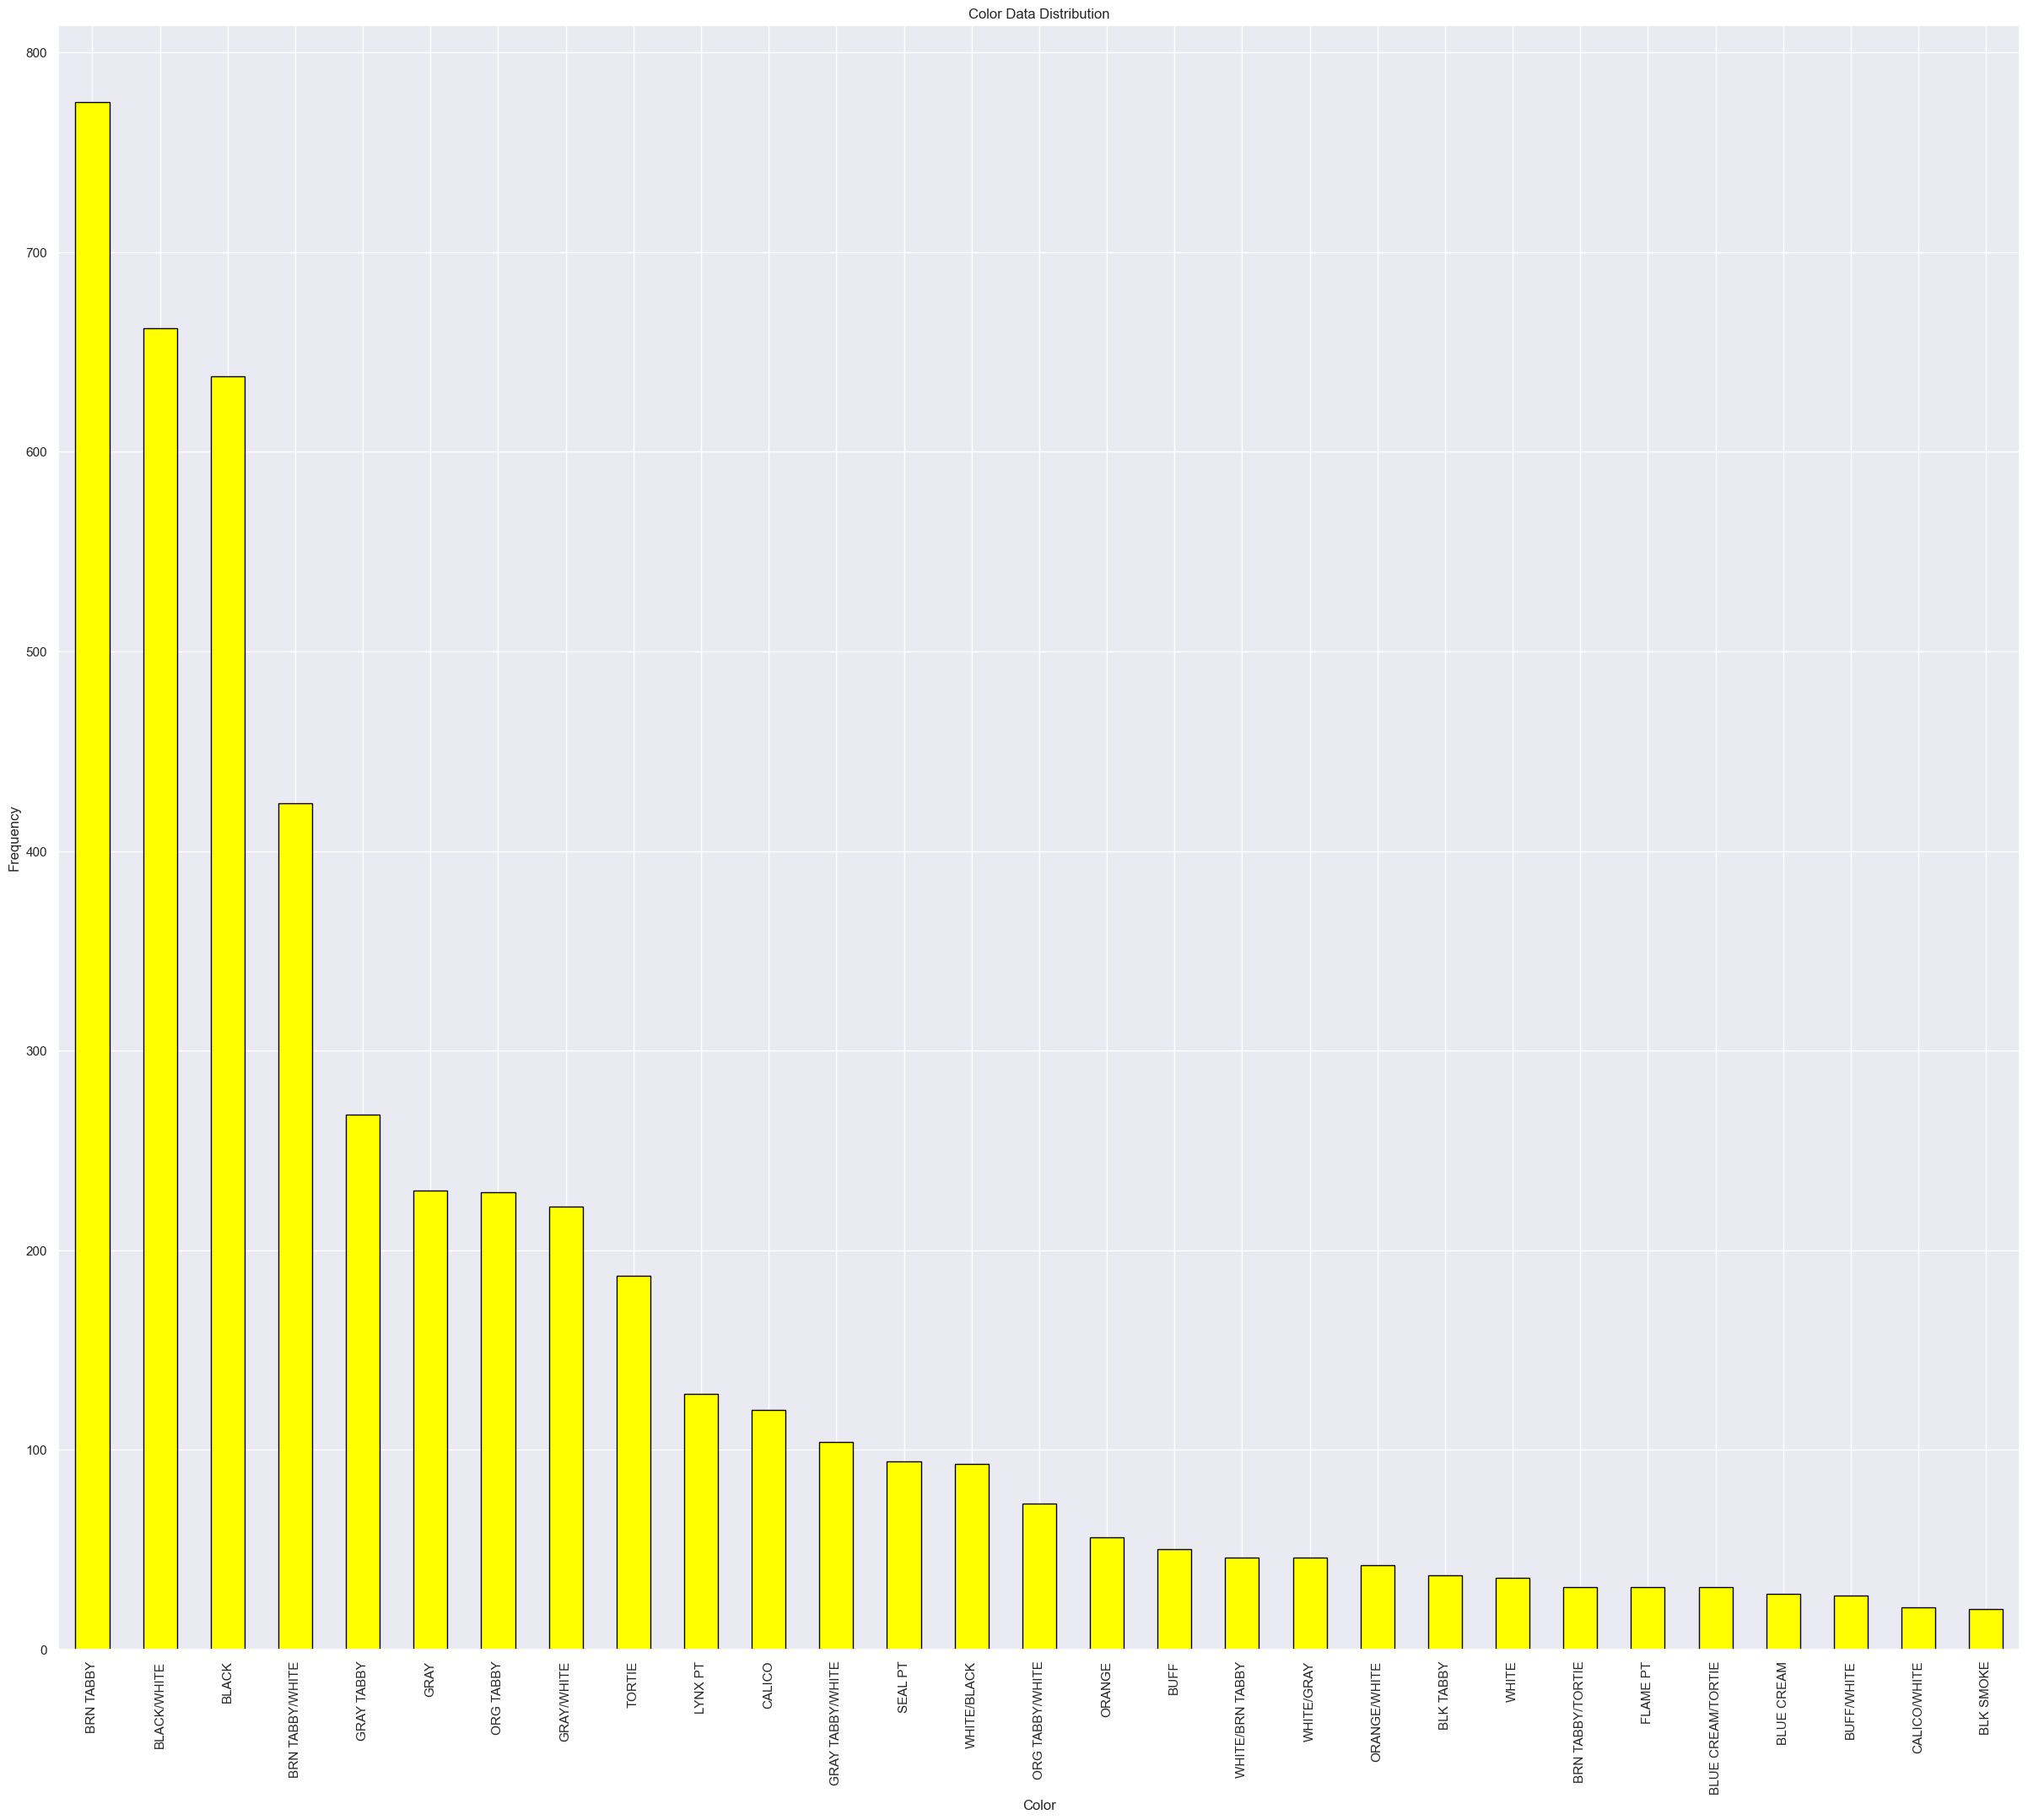

In [17]:
# # Set a frequency threshold (you can adjust this value based on your criteria)
# frequency_threshold = 20

# # Calculate the frequency of each unique value in the specified column
# value_counts = df['Color'].value_counts()

# # Identify values with frequency below the threshold
# low_frequency_values = value_counts[value_counts < frequency_threshold].index

# # Drop rows where the specified values are present in the specified column
# df = df[~df['Color'].isin(low_frequency_values)]

# Plotting bar plot for 'Color' column
category_counts = df['Color'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

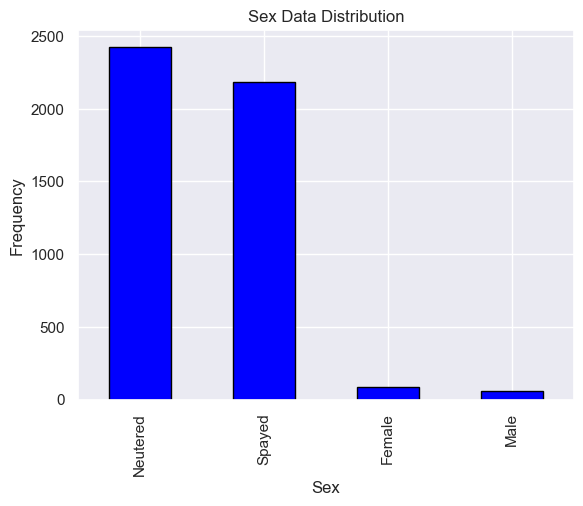

In [18]:
# ploting bar plot for sex column

category_counts = new_df['Sex'].value_counts()
category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Data Distribution')

# Display the plot
plt.show()

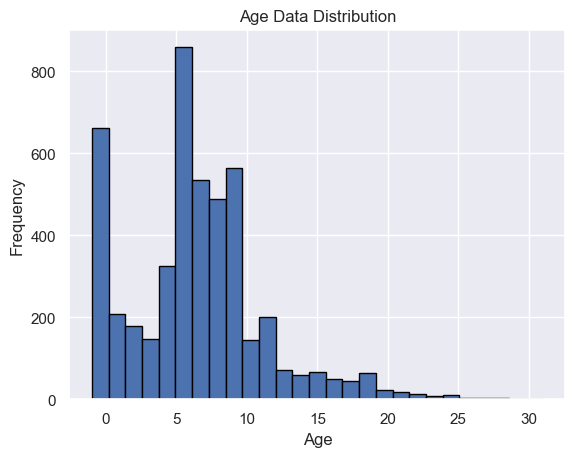

In [19]:
# ploting bar plot for age column
new_df['Age'].plot(bins=27, kind='hist', edgecolor='black')

# category_counts = new_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Data Distribution')

# # Display the plot
plt.show()

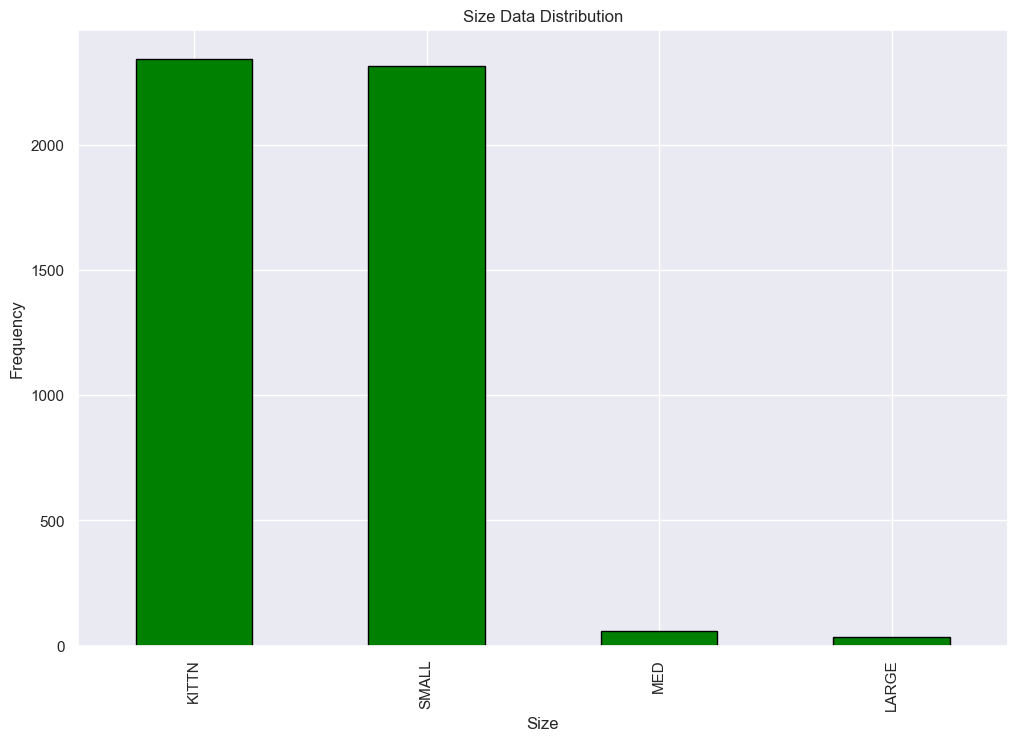

In [20]:
# Drop rows with 'X-LRG' and 'TOY' values in the 'Size' column
df = df[~df['Size'].isin(['X-LRG', 'TOY'])]

# Plotting bar plot for 'Intake_Condition' column
category_counts = df['Size'].value_counts()
category_counts.plot(kind='bar', color='green', edgecolor='black', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Size Data Distribution')

# Display the plot
plt.show()

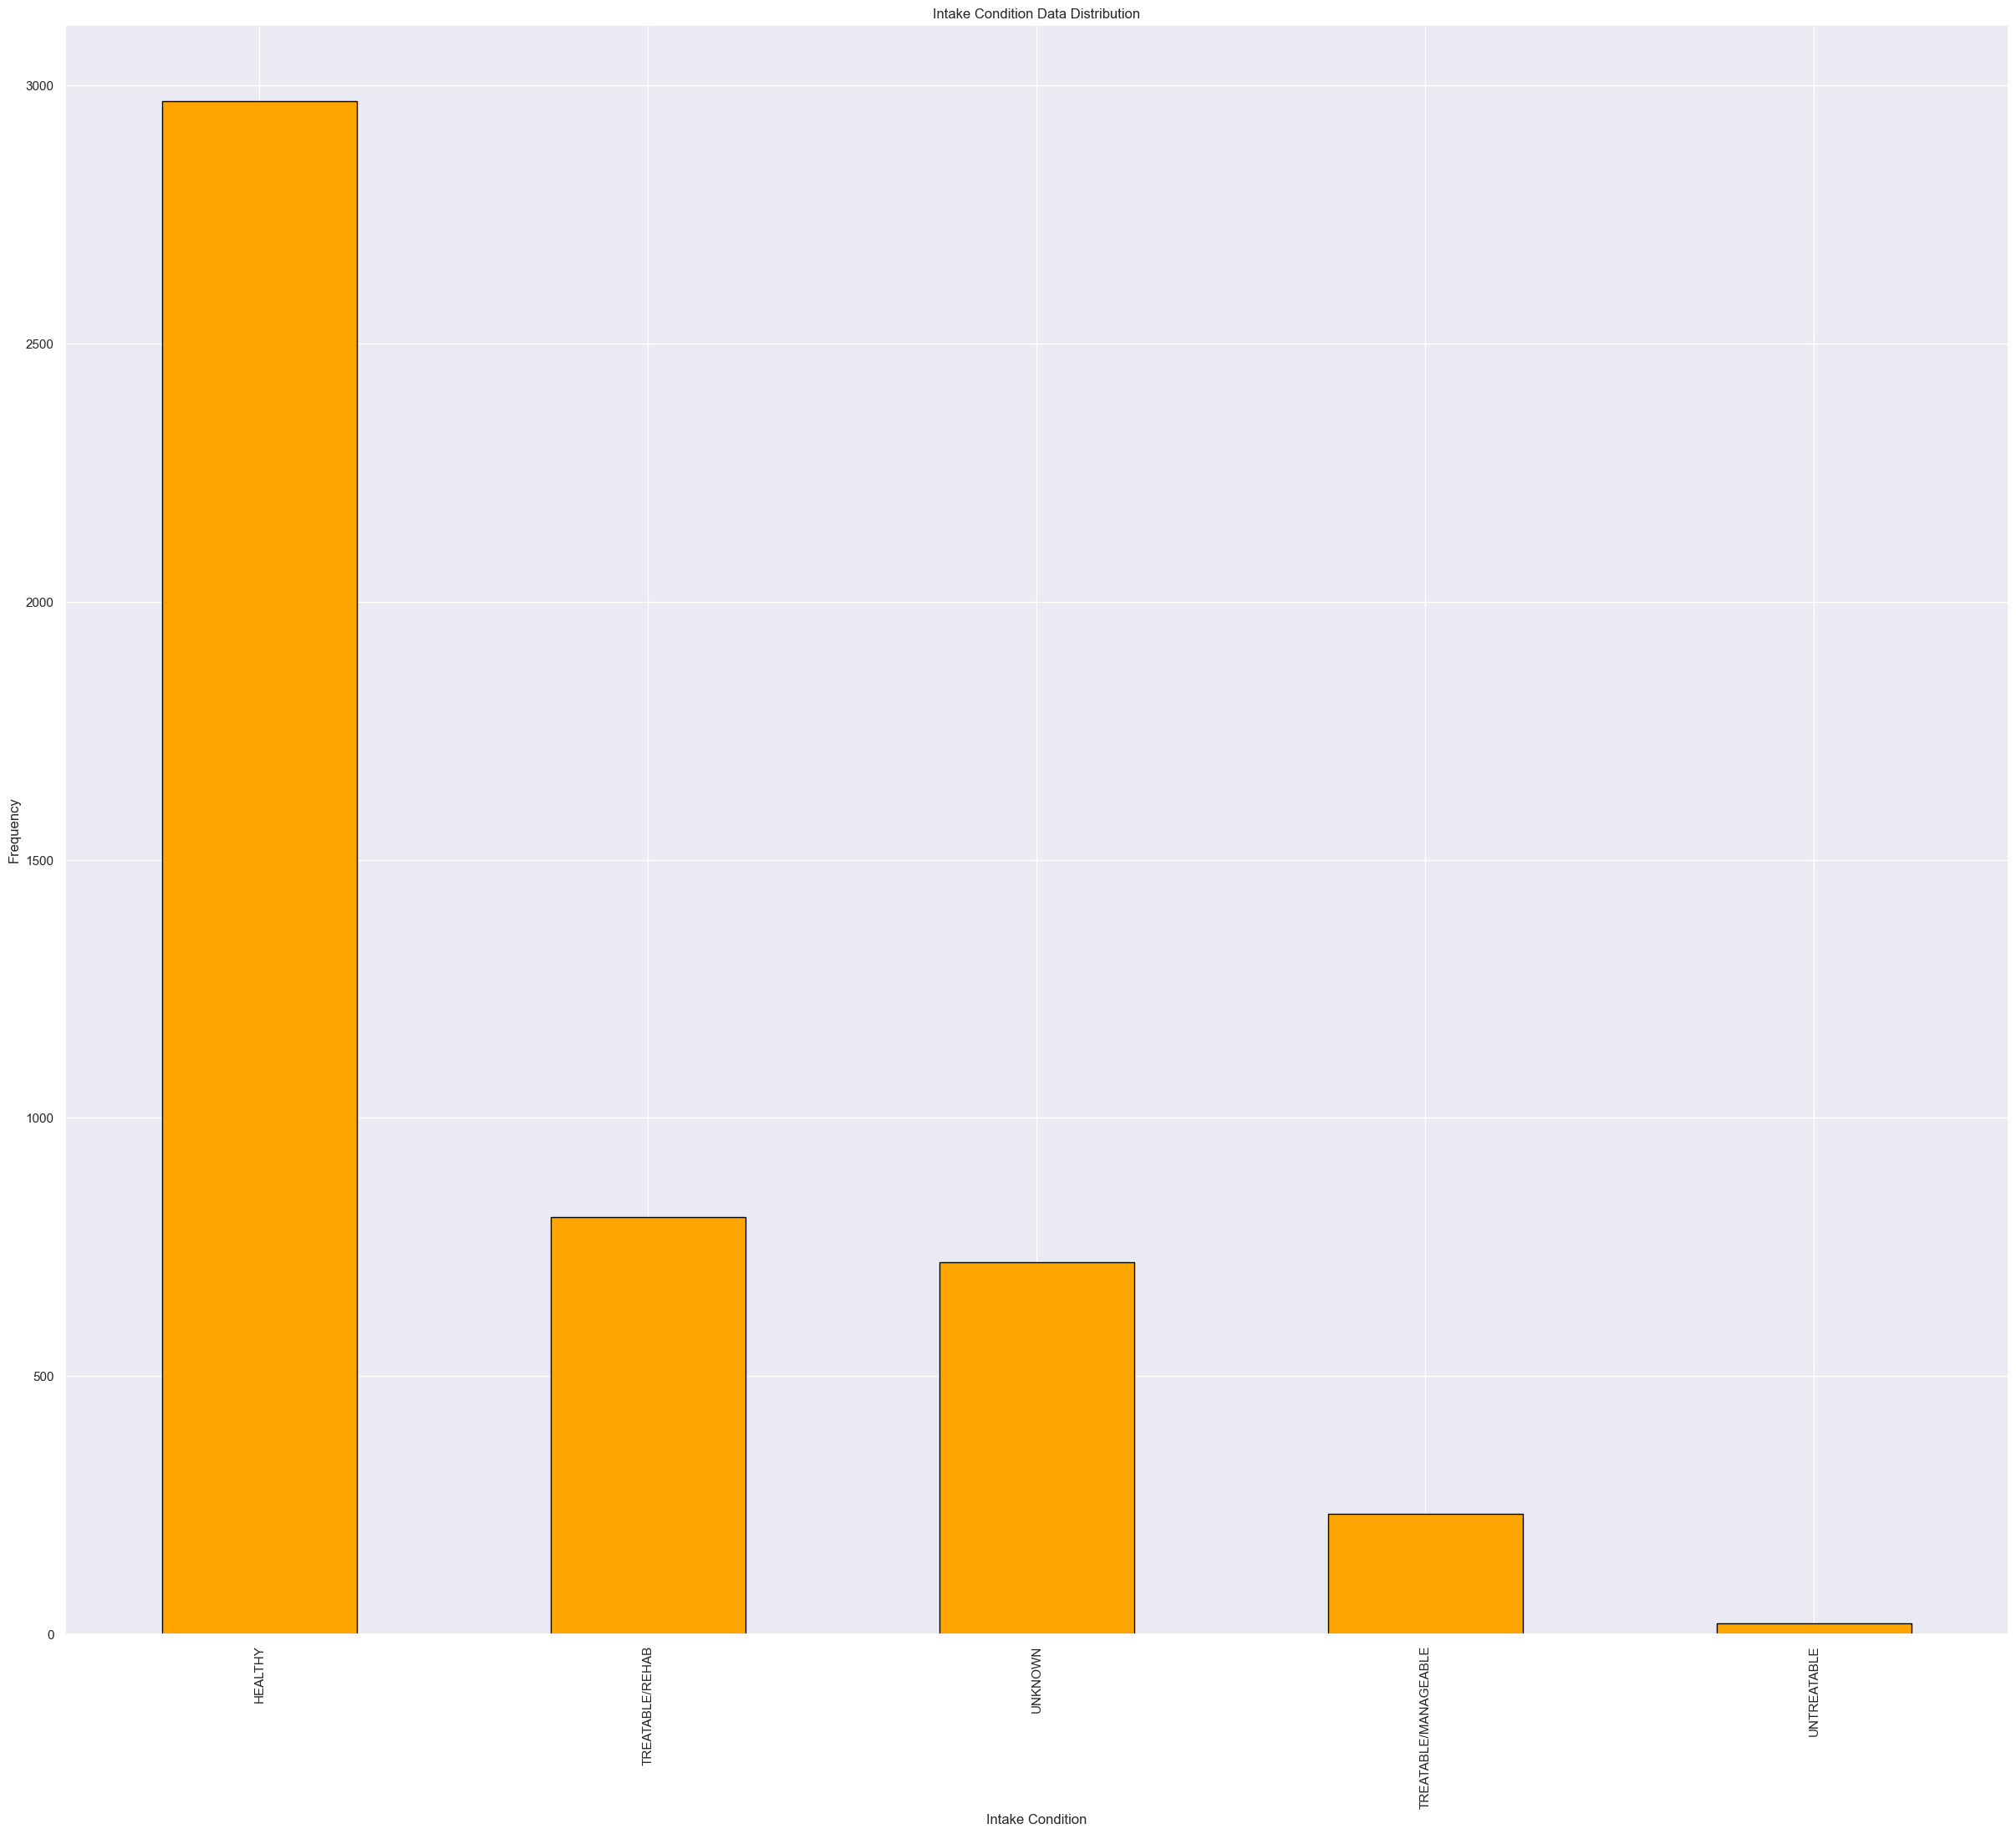

In [21]:
# ploting bar plot for Intake_Condition column
category_counts = new_df['Intake Condition'].value_counts()
category_counts.plot(kind='bar', color='orange', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Intake Condition')
plt.ylabel('Frequency')
plt.title('Intake Condition Data Distribution')

# Display the plot
plt.show()

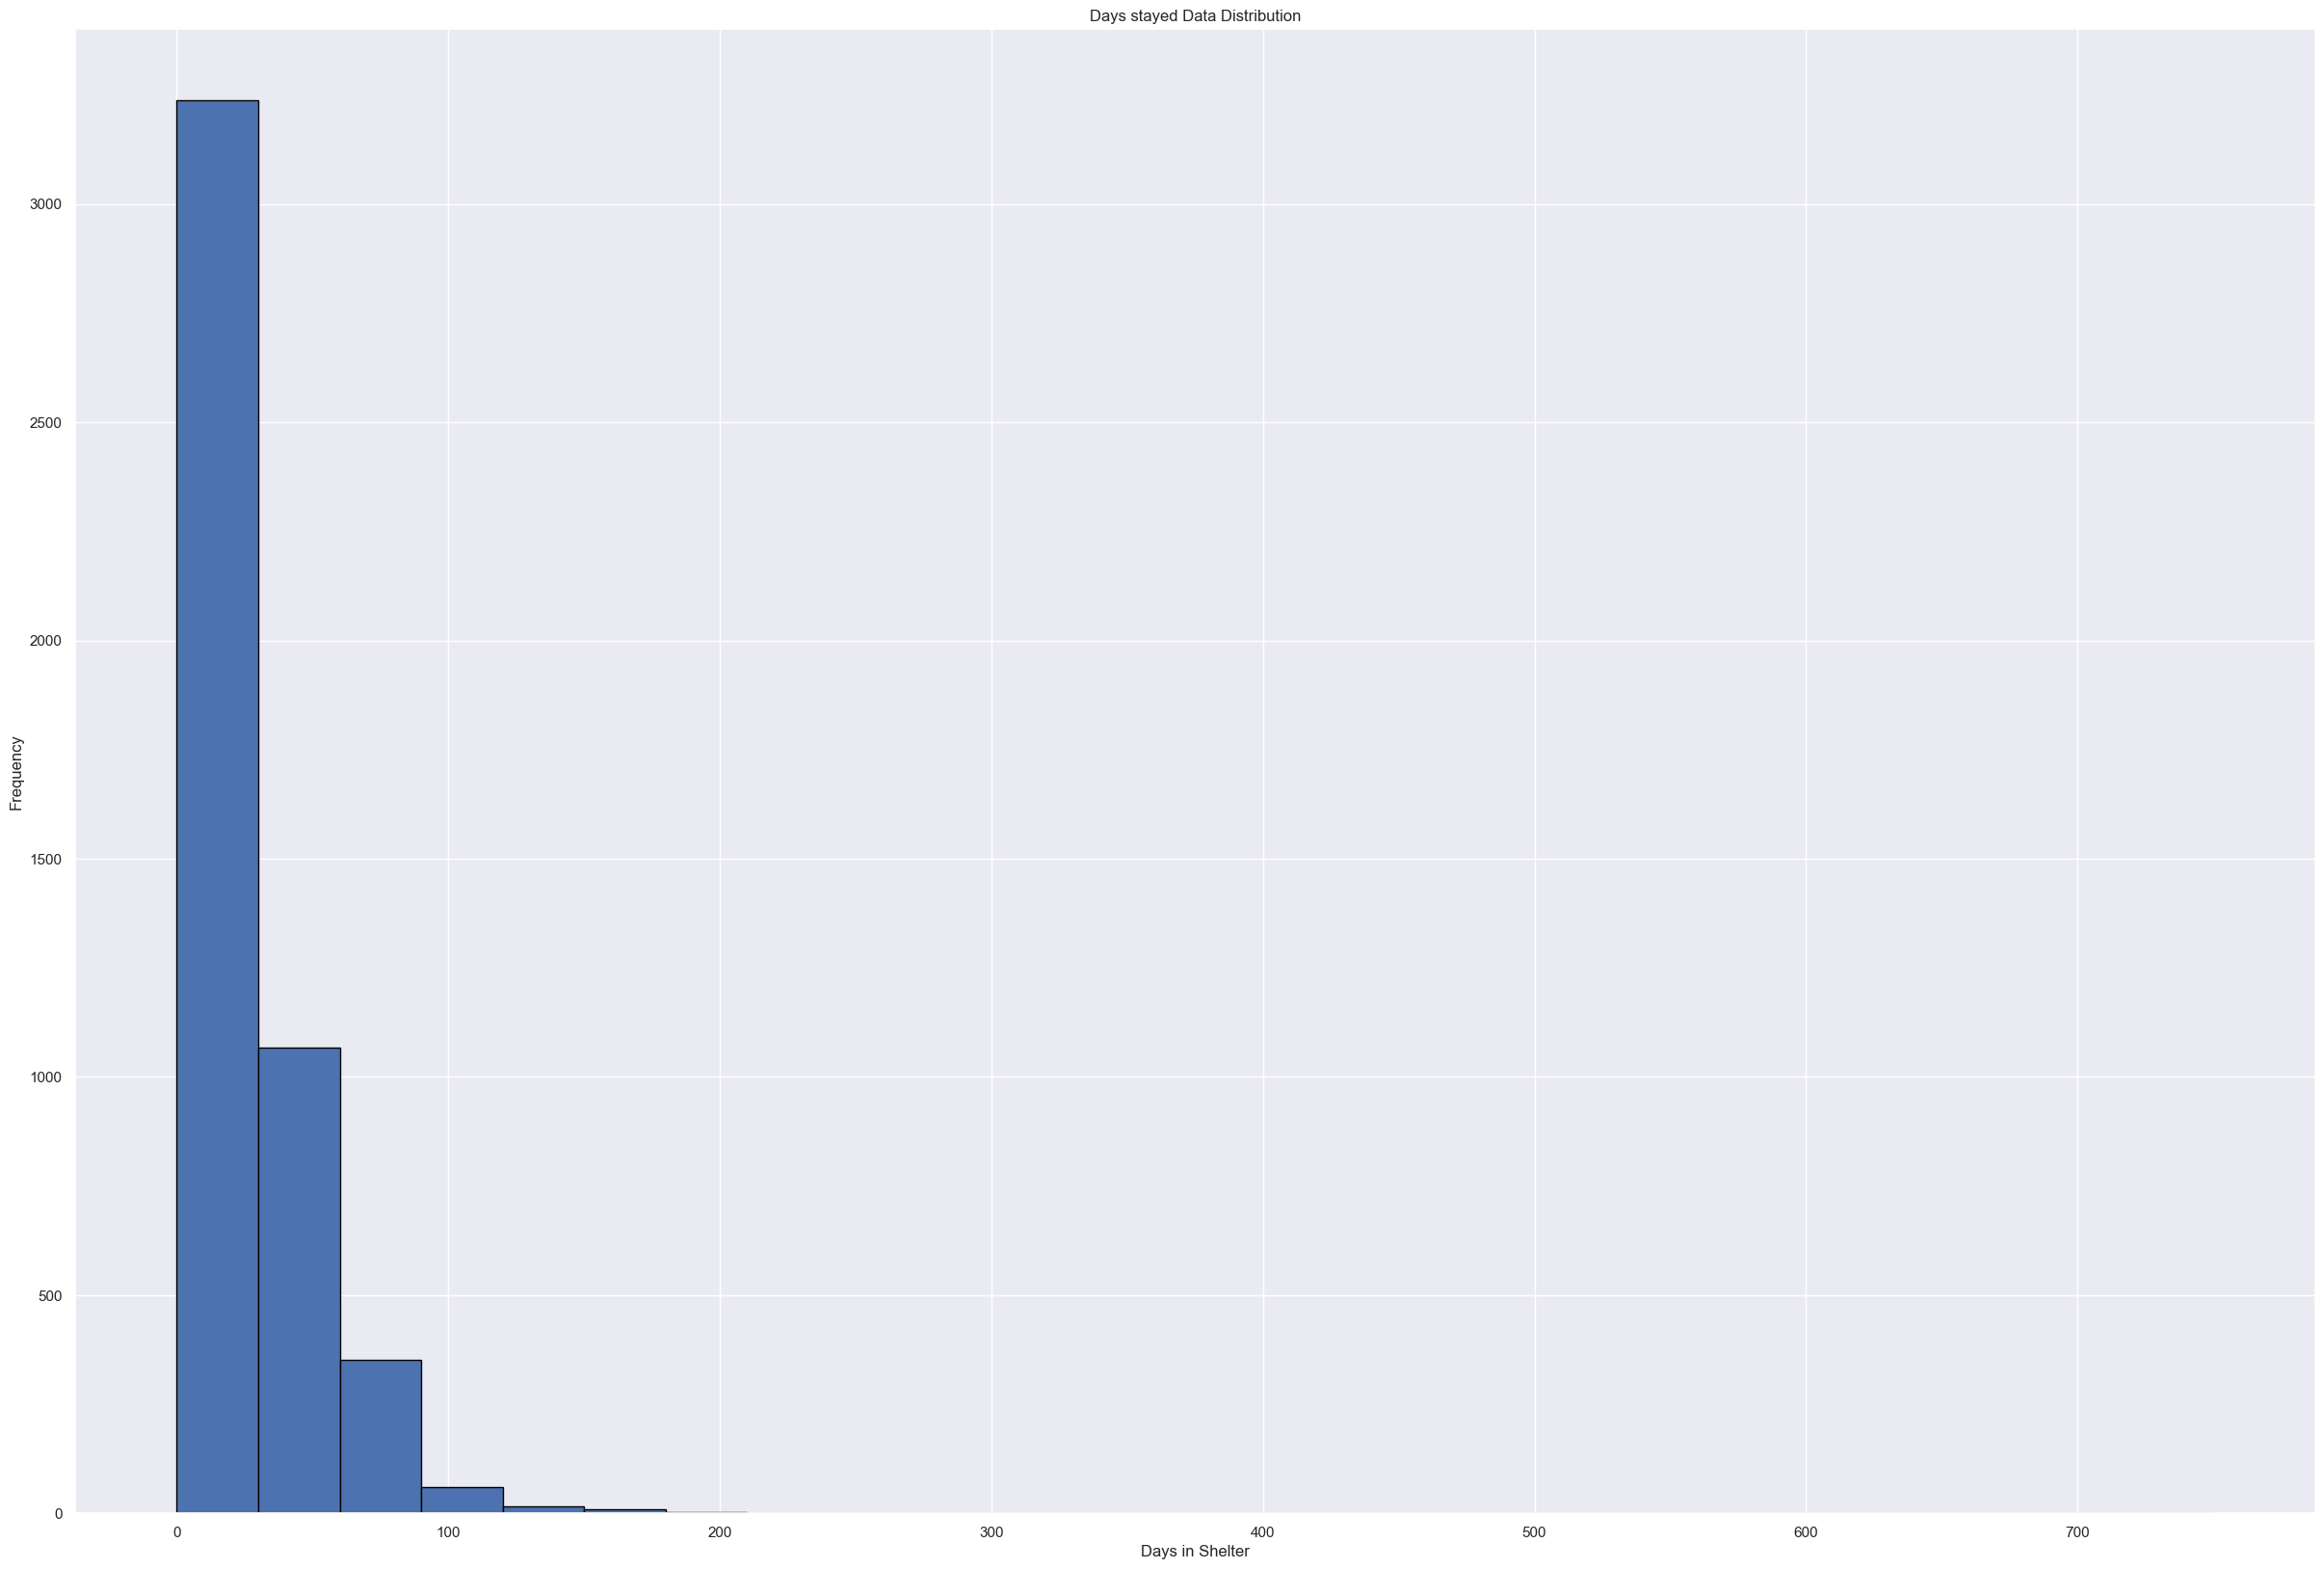

In [22]:
# ploting bar plot for days stayed column
# Calculate bin edges programmatically
bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(new_df['Days in Shelter']) / bin_width) * bin_width)
max_value = int(np.ceil(max(new_df['Days in Shelter']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

new_df['Days in Shelter'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# category_counts = new_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Days in Shelter')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

In [23]:
# # Initialize LabelEncoders for each categorical column
# label_encoders = {}
# for column in ['Color', 'Sex', 'Intake Condition', 'Intake Type','Breed', 'Size']:
#     label_encoders[column] = LabelEncoder()
#     df[column + '_encoded'] = label_encoders[column].fit_transform(df[column])

# # Define the transformer for other preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('scaler', StandardScaler(), ['Color_encoded', 'Sex_encoded', 'Intake Condition_encoded', 'Intake Type_encoded',
#                                      'Breed_encoded','Size_encoded'])
#         # Add more transformers for other columns if needed
#     ],
#     remainder='passthrough'  # Pass through the columns not specified
# )

# # Create a pipeline with LabelEncoder and other transformers
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])

# # Fit and transform the data
# transformed_data = pipeline.fit_transform(df)

# # The transformed_data now contains the encoded and scaled values
# print(transformed_data)

In [24]:
df.head(50)

,Type,Breed,Color,Sex,Size,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Age
0,CAT,DOMESTIC LH,BLACK/WHITE,Neutered,SMALL,A420773,09/29/2023,09/30/2023,1,STRAY,RETURN TO OWNER,HEALTHY,HEALTHY,10
1,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,KITTN,A417889,05/30/2023,08/08/2023,70,STRAY,ADOPTION,UNKNOWN,HEALTHY,0
2,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,A418221,06/13/2023,08/08/2023,56,STRAY,ADOPTION,UNKNOWN,HEALTHY,0
3,CAT,SIAMESE/MIX,LYNX PT,Neutered,KITTN,A420264,09/12/2023,09/30/2023,18,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,0
4,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,A419416,08/01/2023,09/30/2023,60,STRAY,ADOPTION,UNKNOWN,HEALTHY,0
5,CAT,DOMESTIC SH,BRN TABBY/WHITE,Spayed,KITTN,A419414,09/12/2023,09/30/2023,18,STRAY,ADOPTION,HEALTHY,HEALTHY,0
6,CAT,DOMESTIC MH,BRN TABBY/WHITE,Neutered,SMALL,A419755,08/17/2023,09/30/2023,44,STRAY,ADOPTION,HEALTHY,HEALTHY,2
7,CAT,DOMESTIC SH,GRAY TABBY,Neutered,KITTN,A420237,09/07/2023,09/30/2023,23,STRAY,ADOPTION,HEALTHY,HEALTHY,0
8,CAT,DOMESTIC SH,BLACK,Spayed,KITTN,A418629,06/27/2023,08/11/2023,45,STRAY,ADOPTION,HEALTHY,HEALTHY,0
9,CAT,DOMESTIC MH,BLACK,Neutered,SMALL,A418390,06/17/2023,08/11/2023,55,STRAY,ADOPTION,HEALTHY,HEALTHY,3


In [25]:
# # Initialize a dictionary to store mappings
# mappings = {}

# # Use classes_ attribute to get the mapping
# original_columns = ['Color', 'Sex', 'Intake Condition', 'Intake Type','Breed', 'Size']
# encoded_columns = ['Color_encoded', 'Sex_encoded', 'Intake Condition_encoded', 'Intake Type_encoded',
#                                      'Breed_encoded','Size_encoded']

# for col, encoded_col in zip(original_columns, encoded_columns):
#     mappings[col] = dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))

# # Display the mappings
# for col, mapping in mappings.items():
#     print(f"{col} mapping:")
#     print(mapping)
#     print()

In [26]:
# # Create DataFrames for each mapping
# dfs = [pd.DataFrame({f"{col} (Original)": list(mapping.keys()), f"{encoded_col} (Encoded)": list(mapping.values())}) for col, mapping in mappings.items()]

# # Concatenate DataFrames side by side
# result_df = pd.concat(dfs, axis=1)

# # Display the result DataFrame
# print(result_df)

In [27]:
#df.to_csv("/dataset/encoded_dataset_nov_17.csv", index = False)

In [28]:
# df.head()